In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE

import pandas as pd
import sklearn
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("../data/raw/dataset.csv", sep = ',')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train_feat, df_test_feat = train_test_split(df_train, test_size=0.3, random_state=42)

In [3]:
df_ranks = pd.read_csv('../data/processed/ranks_borda_agg.csv',sep=';', index_col=0)


In [4]:
df_train_feat[['TARGET']].value_counts()

TARGET
0         40880
1          1691
dtype: int64

In [5]:
df_train_feat[['TARGET']].value_counts()/df_train_feat['TARGET'].count()

TARGET
0         0.960278
1         0.039722
dtype: float64

## Isolation Forest - Features Analysis

In [6]:
y= df_train['TARGET']
ks_list = []
for n_features in range(10,350,10):
    features = df_ranks.head(n_features)['Features'].values
    X = df_train_feat[features]
    y = df_train_feat['TARGET']
    trainX = X[y==0]
    oc_clf = IsolationForest(random_state=42)
    oc_clf.fit(trainX)
    X_test = df_test_feat[features]
    df_test_feat['score'] = oc_clf.score_samples(X_test)
    from scipy.stats import ks_2samp
    yhat = df_test_feat['score']
    y = df_test_feat['TARGET']
    def ks_stat(y, yhat):
        return ks_2samp(yhat[y==1], yhat[y!=1]).statistic
    ks = ks_stat(y, yhat)
    print('number of features: ', n_features, ' ks: ', ks)
    ks_list.append(ks)

number of features:  10  ks:  0.14568609260352527
number of features:  20  ks:  0.24669494009967985
number of features:  30  ks:  0.2488029976264774
number of features:  40  ks:  0.25229902368301627
number of features:  50  ks:  0.2674859536460279
number of features:  60  ks:  0.27773547472459514
number of features:  70  ks:  0.23407069161475846
number of features:  80  ks:  0.18436246219833974
number of features:  90  ks:  0.18601629738510905
number of features:  100  ks:  0.20950814668449813
number of features:  110  ks:  0.2050068876331843
number of features:  120  ks:  0.19238063109194092
number of features:  130  ks:  0.17563866231320058
number of features:  140  ks:  0.19202841801306847
number of features:  150  ks:  0.2018562472640233
number of features:  160  ks:  0.24072739832206813
number of features:  170  ks:  0.21666847391735644
number of features:  180  ks:  0.17245950754426764
number of features:  190  ks:  0.23594782266453018
number of features:  200  ks:  0.19739635417

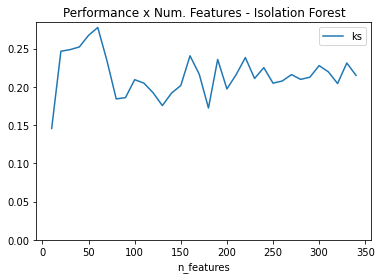

In [7]:
from matplotlib import pyplot as plt
perf_rank_if = pd.DataFrame(ks_list, list(range(10,350,10))).reset_index(drop=False)
perf_rank_if.columns = ['n_features','ks']
ax = perf_rank_if.plot.line(x='n_features', y='ks', rot=0)

plt.title("Performance x Num. Features - Isolation Forest")
plt.legend()
ax.set_ylim(ymin=0)
plt.savefig('../reports/figures/perfxnfeatures_if.png', bbox_inches='tight', dpi=plt.gcf().dpi)

In [8]:
perf_rank_if.iloc[perf_rank_if['ks'].idxmax()]

n_features    60.000000
ks             0.277735
Name: 5, dtype: float64

## OCSVM - Features Analysis

In [16]:
from sklearn.preprocessing import StandardScaler

X = df_train_feat.drop(['TARGET','ID'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns= list(df_train_feat.drop(['TARGET','ID'], axis=1).columns))
X_scaled = X_scaled.set_index(df_train_feat.index)

In [17]:
y= df_train['TARGET']
ks_list = []
best_ocsvmparams = {'kernel': 'linear', 'degree': 77, 'gamma': 'scale', 'tol': 0.23960392536570452, 'shrinking': True}
scaler = StandardScaler()
for n_features in range(10,350,10):
    features = df_ranks.head(n_features)['Features'].values
    X = X_scaled[features]
    y = df_train_feat['TARGET']
    trainX = X[y==0]
    oc_clf = OneClassSVM(**best_ocsvmparams)
    oc_clf.fit(trainX)
    X_test = df_test_feat[features]
    df_test_feat['score'] = oc_clf.score_samples(X_test)
    from scipy.stats import ks_2samp
    yhat = df_test_feat['score']
    y = df_test_feat['TARGET']
    def ks_stat(y, yhat):
        return ks_2samp(yhat[y==1], yhat[y!=1]).statistic
    ks = ks_stat(y, yhat)
    print('number of features: ', n_features, ' ks: ', ks)
    ks_list.append(ks)

number of features:  10  ks:  0.18078089294248523
number of features:  20  ks:  0.18699181114631902
number of features:  30  ks:  0.17953268513275256
number of features:  40  ks:  0.17614268445001346
number of features:  50  ks:  0.1379615015441953
number of features:  60  ks:  0.19939838632593965
number of features:  70  ks:  0.1944674032217255
number of features:  80  ks:  0.16800162250950823
number of features:  90  ks:  0.12862765414844357
number of features:  100  ks:  0.10444423025177008
number of features:  110  ks:  0.18046482487740811
number of features:  120  ks:  0.1475266770282373
number of features:  130  ks:  0.1614915039137017
number of features:  140  ks:  0.16418069294007565
number of features:  150  ks:  0.09245091306320963
number of features:  160  ks:  0.2140198476286863
number of features:  170  ks:  0.1437334586360478
number of features:  180  ks:  0.14067800013654785
number of features:  190  ks:  0.09471921348449985
number of features:  200  ks:  0.1398085117491

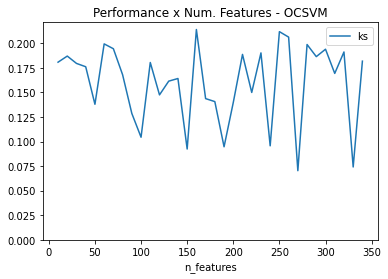

In [24]:
from matplotlib import pyplot as plt
perf_rank_if = pd.DataFrame(ks_list, list(range(10,350,10))).reset_index(drop=False)
perf_rank_if.columns = ['n_features','ks']
ax = perf_rank_if.plot.line(x='n_features', y='ks', rot=0)

plt.title("Performance x Num. Features - OCSVM")
plt.legend()
ax.set_ylim(ymin=0)
plt.savefig('../reports/figures/perfxnfeatures_ocsvm.png', bbox_inches='tight', dpi=plt.gcf().dpi)

In [23]:
perf_rank_if.iloc[perf_rank_if['ks'].idxmax()]

n_features    160.00000
ks              0.21402
Name: 15, dtype: float64

## Random forest - Features Analysis

In [12]:
X = df_train_feat.drop(['TARGET','ID'], axis=1)
y = df_train_feat['TARGET']
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
# summarize the new class distribution
best_rf_params = {'n_estimators': 928, 'max_depth': 9, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 8, 'bootstrap': False}
clf_rf= sklearn.ensemble.RandomForestClassifier(**best_rf_params,verbose=0,n_jobs =-1).fit(X_smote, y_smote)

In [13]:
y= df_train['TARGET']
ks_list = []
best_rf_params = {'n_estimators': 928, 'max_depth': 9, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 8, 'bootstrap': False}
scaler = StandardScaler()
for n_features in range(10,350,10):
    features = df_ranks.head(n_features)['Features'].values
    X = X_smote[features]
    clf = sklearn.ensemble.RandomForestClassifier(**best_rf_params,verbose=0,n_jobs =-1).fit(X, y_smote)
    X_test = df_test_feat[features]
    df_test_feat['score'] = clf.predict_proba(X_test)
    from scipy.stats import ks_2samp
    yhat = df_test_feat['score']
    y = df_test_feat['TARGET']
    def ks_stat(y, yhat):
        return ks_2samp(yhat[y==1], yhat[y!=1]).statistic
    ks = ks_stat(y, yhat)
    print('number of features: ', n_features, ' ks: ', ks)
    ks_list.append(ks)

number of features:  10  ks:  0.4134146194532464
number of features:  20  ks:  0.41815363237308084
number of features:  30  ks:  0.4294662184684956
number of features:  40  ks:  0.42431957011530264
number of features:  50  ks:  0.4911533070679567
number of features:  60  ks:  0.48757615553601047
number of features:  70  ks:  0.4898625284641983
number of features:  80  ks:  0.47945396932493156
number of features:  90  ks:  0.4797483503817315
number of features:  100  ks:  0.4756153688598658
number of features:  110  ks:  0.4752438784403025
number of features:  120  ks:  0.4698313634300815
number of features:  130  ks:  0.4747201773515344
number of features:  140  ks:  0.4525865773483214
number of features:  150  ks:  0.45026566585139577
number of features:  160  ks:  0.45430266228107163
number of features:  170  ks:  0.4539207299686341
number of features:  180  ks:  0.4513612613806592
number of features:  190  ks:  0.4478254758089455
number of features:  200  ks:  0.4476567990779005
num

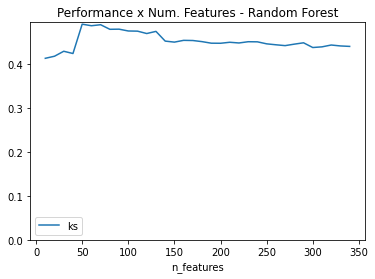

In [14]:
from matplotlib import pyplot as plt
perf_rank_if = pd.DataFrame(ks_list, list(range(10,350,10))).reset_index(drop=False)
perf_rank_if.columns = ['n_features','ks']
ax = perf_rank_if.plot.line(x='n_features', y='ks', rot=0)

plt.title("Performance x Num. Features - Random Forest")
plt.legend()
ax.set_ylim(ymin=0)
plt.savefig('../reports/figures/perfxnfeatures_rf.png', bbox_inches='tight', dpi=plt.gcf().dpi)

In [15]:
perf_rank_if.iloc[perf_rank_if['ks'].idxmax()]

n_features    50.000000
ks             0.491153
Name: 4, dtype: float64